In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

import random

%matplotlib inline

from scipy.stats import zscore

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
df.shape

(17379, 17)

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.head(200)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2011-01-09,1,0,1,10,0,0,0,1,0.14,0.1061,0.43,0.3881,0,49,49
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
197,198,2011-01-09,1,0,1,12,0,0,0,1,0.18,0.1364,0.37,0.4478,4,79,83
198,199,2011-01-09,1,0,1,13,0,0,0,1,0.20,0.1667,0.34,0.4478,6,69,75


In [7]:
##Checking the mean counts of the columns grouping by holiday
df[['holiday','cnt']].groupby(['holiday'],as_index=False).mean()

,holiday,cnt
0,0,190.42858
1,1,156.87000


In [8]:
##Checking the mean counts of the columns grouping by weekday
df[['weekday','cnt']].groupby(['weekday'],as_index=False).mean()

,weekday,cnt
0,0,177.468825
1,1,183.744655
2,2,191.238891
3,3,191.130505
4,4,196.436665
5,5,196.135907
6,6,190.209793


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026EDCFD2248>,
      dtype=object)

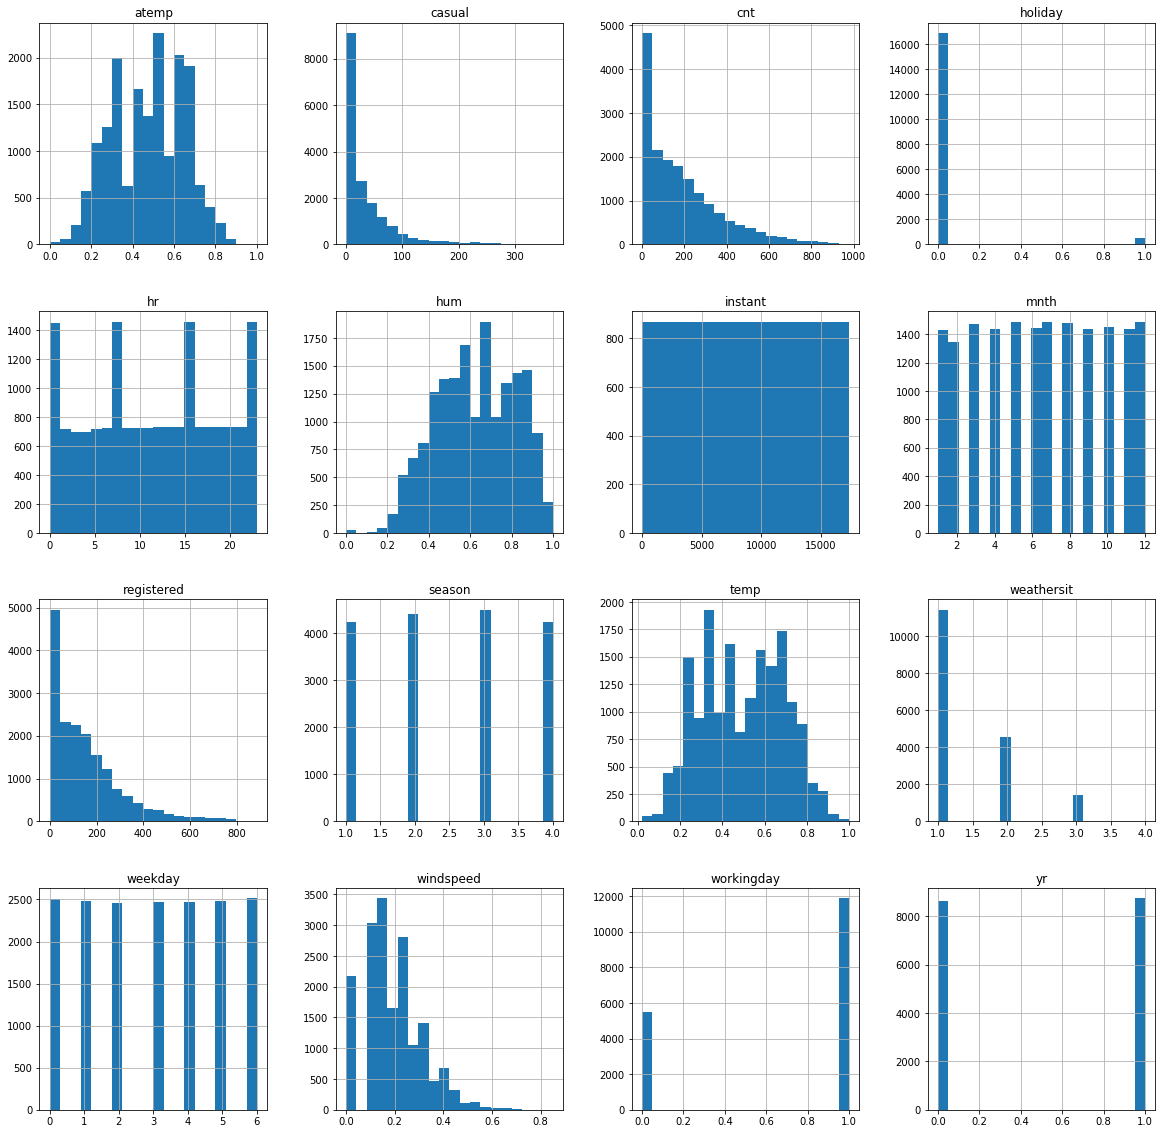

In [9]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=20)

In [10]:
df['cnt'].value_counts()

5      260
6      236
4      231
3      224
2      208
      ... 
725      1
709      1
661      1
629      1
887      1
Name: cnt, Length: 869, dtype: int64

In [11]:
df['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [12]:
df.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

(array([9.102e+03, 2.754e+03, 1.797e+03, 1.188e+03, 7.900e+02, 4.720e+02,
        2.950e+02, 2.010e+02, 1.600e+02, 1.530e+02, 1.150e+02, 7.900e+01,
        9.000e+01, 6.000e+01, 5.700e+01, 2.500e+01, 1.800e+01, 1.000e+01,
        4.000e+00, 9.000e+00]),
 array([  0.  ,  18.35,  36.7 ,  55.05,  73.4 ,  91.75, 110.1 , 128.45,
        146.8 , 165.15, 183.5 , 201.85, 220.2 , 238.55, 256.9 , 275.25,
        293.6 , 311.95, 330.3 , 348.65, 367.  ]),
 <a list of 20 Patch objects>)

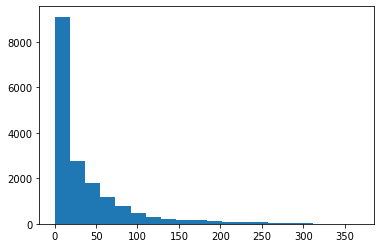

In [13]:
plt.hist(df['casual'],bins=20)

In [14]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

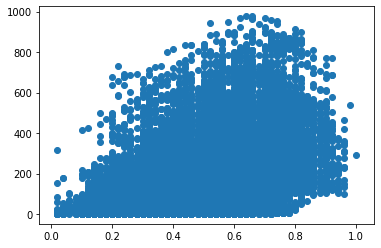

In [15]:
plt.scatter(x='temp',y='cnt',data=df)

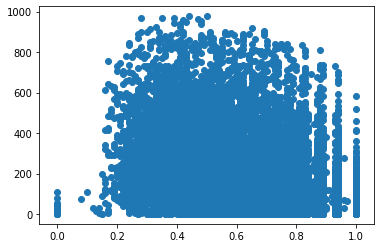

In [16]:
plt.scatter(x='hum',y='cnt',data=df)

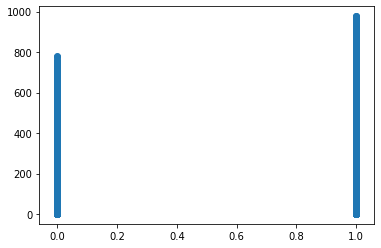

In [17]:
plt.scatter(x='workingday',y='cnt',data=df)

In [18]:
#classifying te categorical variables
weathersit=pd.get_dummies(df['weathersit'],prefix='weathersit')
df=pd.concat([df,weathersit],axis=1)
df.head()
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,13,16,1,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,32,40,1,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,27,32,1,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,10,13,1,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,1,0,0,0,1,0,0,0


In [19]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,13,16,1,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,32,40,1,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,27,32,1,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,10,13,1,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,1,0,0,0,1,0,0,0


In [20]:
df.drop(['season','weathersit'],inplace=True,axis=1)
df.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,...,registered,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,...,13,16,1,0,0,0,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,...,32,40,1,0,0,0,1,0,0,0
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,...,27,32,1,0,0,0,1,0,0,0
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,...,10,13,1,0,0,0,1,0,0,0
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,...,1,1,1,0,0,0,1,0,0,0


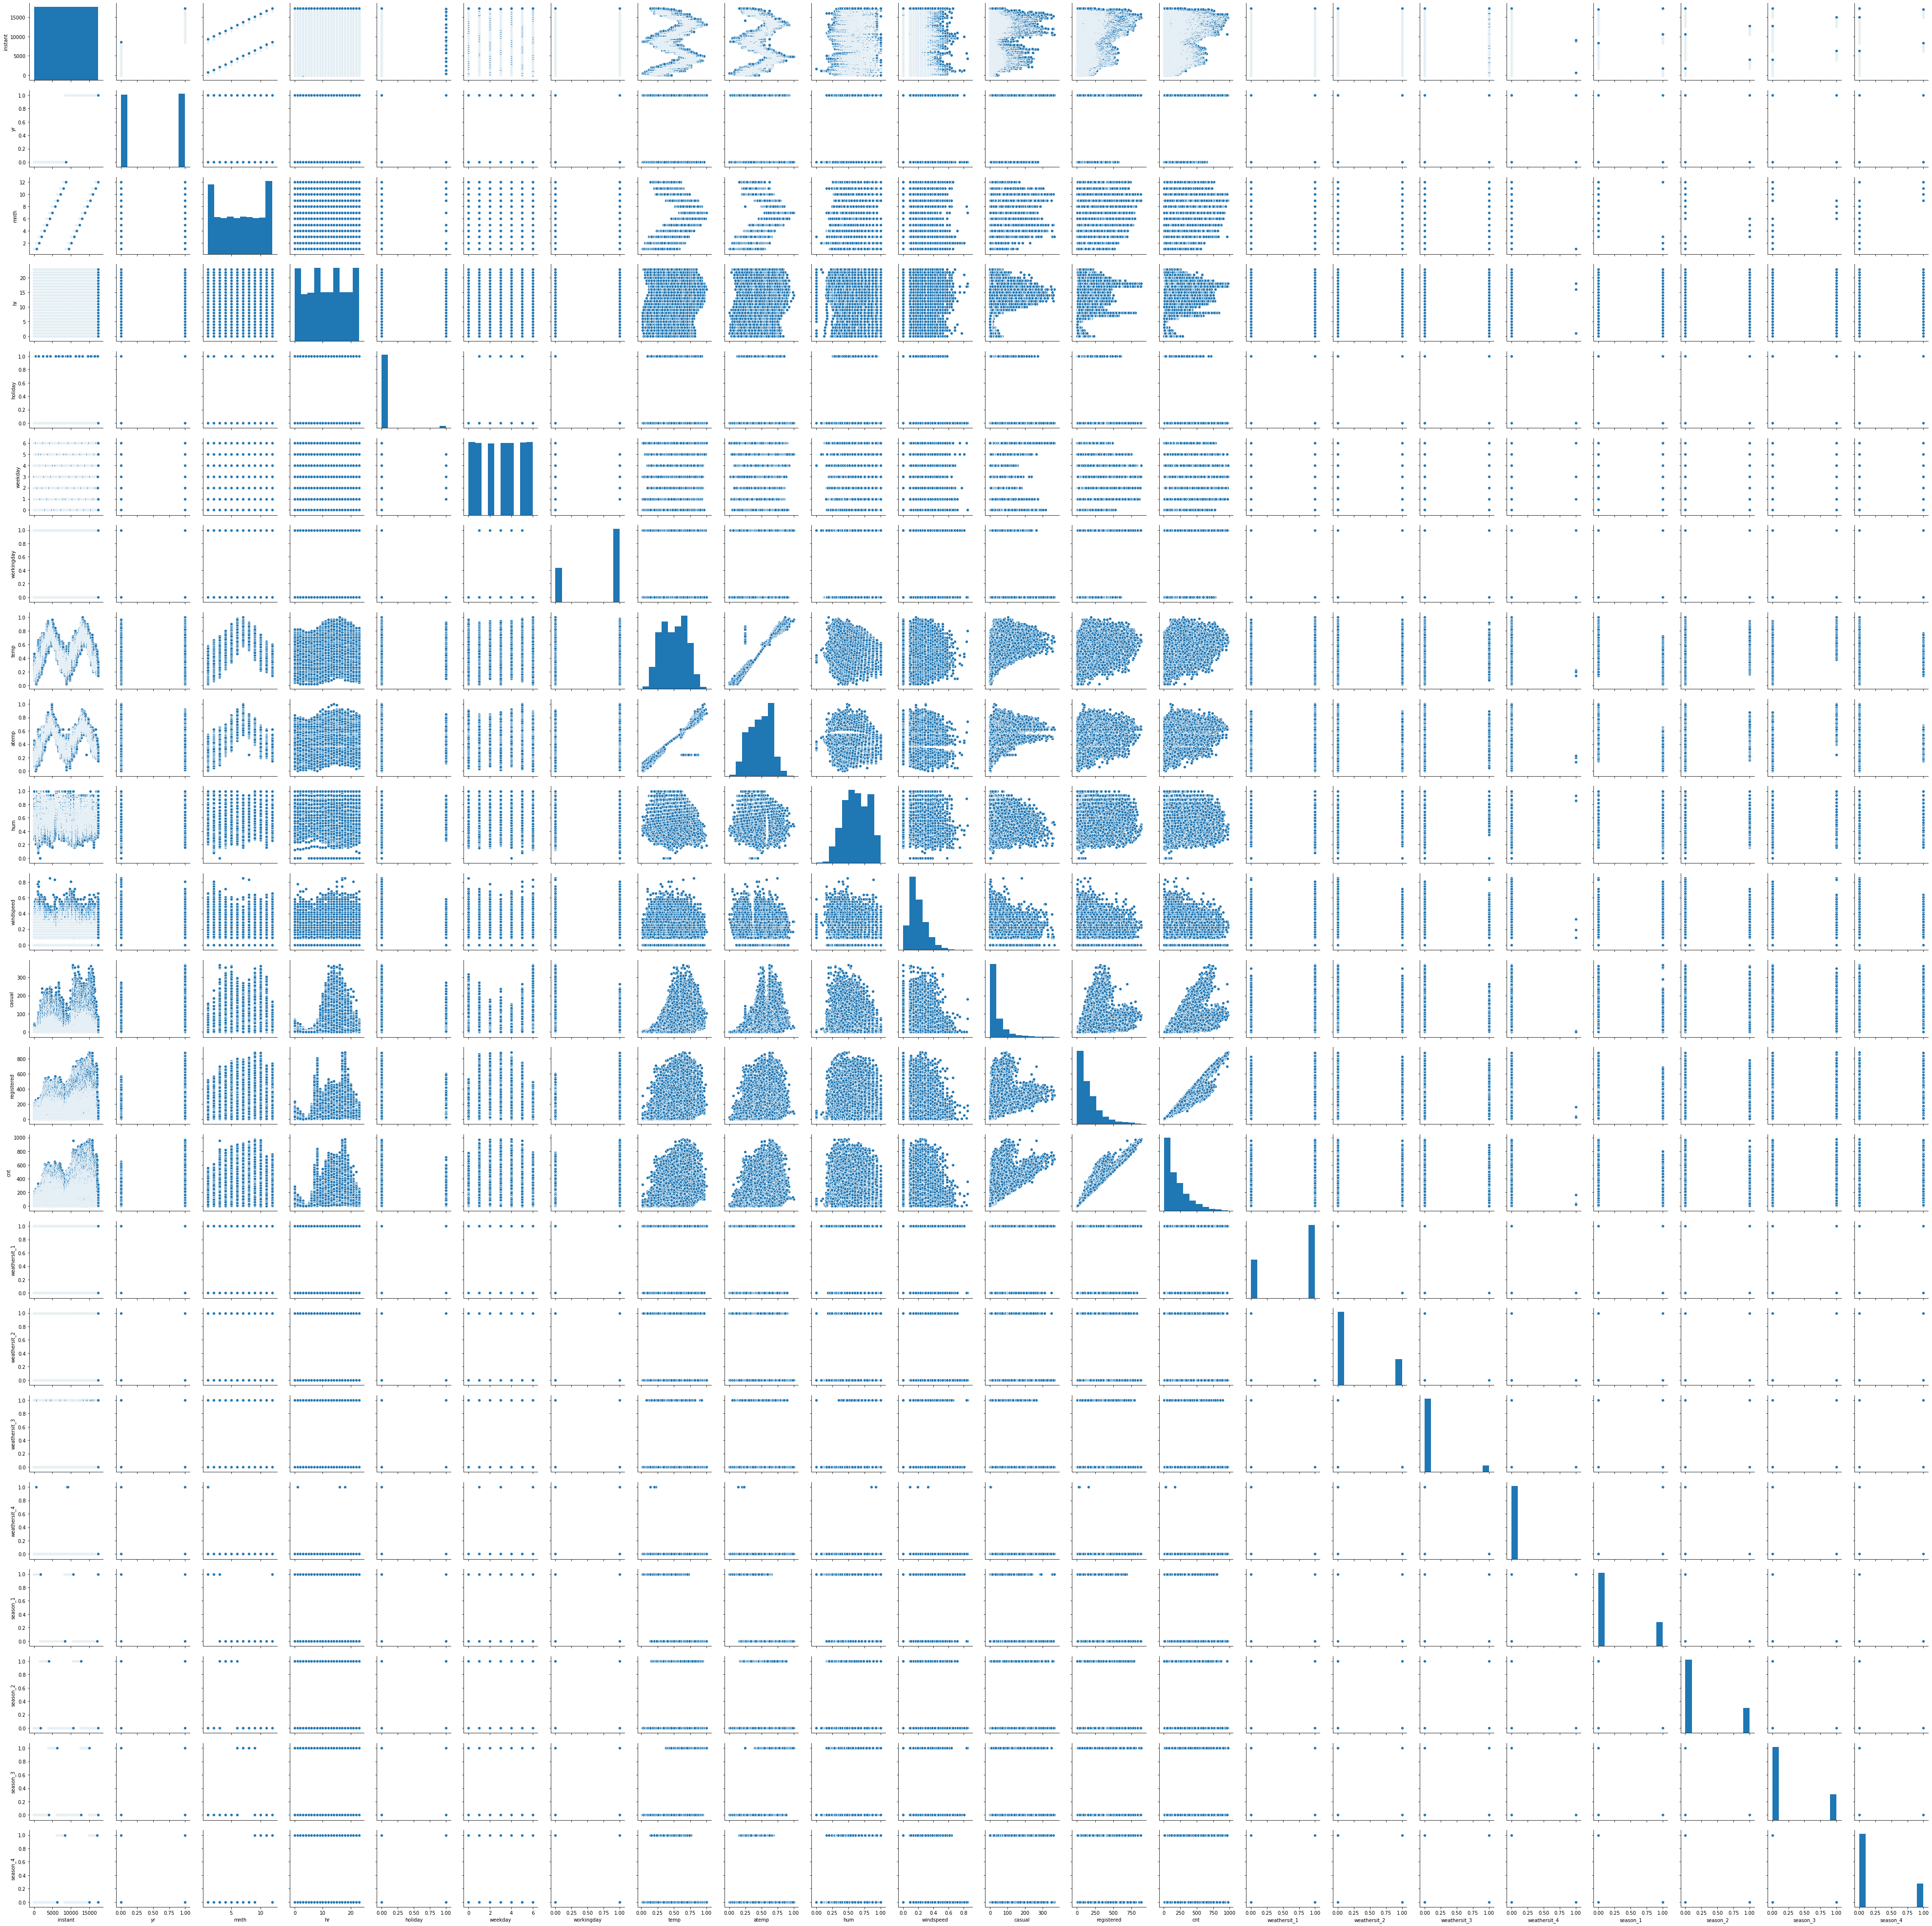

In [21]:
sns.pairplot(df)

In [22]:
#Dropping few columns that dont have te correlation 
df=df.drop(['dteday'],axis=1)
df['casual']=np.cbrt(df['casual'])
df['registered']=np.cbrt(df['registered'])
df['cnt']=df['registered']+df['casual']
df=df.drop(['registered','casual'],axis=1)
df=df.drop(['instant','yr'],axis=1)
df=df.drop(['atemp'],axis=1)
df.head()

,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
0,1,0,0,6,0,0.24,0.81,0.0,3.793584,1,0,0,0,1,0,0,0
1,1,1,0,6,0,0.22,0.80,0.0,5.174802,1,0,0,0,1,0,0,0
2,1,2,0,6,0,0.22,0.80,0.0,4.709976,1,0,0,0,1,0,0,0
3,1,3,0,6,0,0.24,0.75,0.0,3.596684,1,0,0,0,1,0,0,0
4,1,4,0,6,0,0.24,0.75,0.0,1.000000,1,0,0,0,1,0,0,0


In [23]:
df.describe()

,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.627229,0.190098,7.313805,0.656712,0.261465,0.081650,0.000173,0.244088,0.253697,0.258703,0.243512
std,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.192930,0.122340,3.155822,0.474820,0.439445,0.273839,0.013138,0.429557,0.435139,0.437935,0.429214
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.842969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.630000,0.194000,7.582770,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.780000,0.253700,9.689421,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.850700,15.264413,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.corr()

,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
mnth,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.201691,0.164411,-0.135386,0.126275,-0.010419,0.014027,-0.003428,-0.021161,-0.564834,-0.319382,0.197900,0.687155
hr,-0.005772,1.000000,0.000479,-0.003498,0.002285,0.137603,-0.276498,0.137252,0.528275,0.036999,-0.050555,0.016963,0.000228,0.008363,-0.002919,-0.003348,-0.001994
holiday,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.027340,-0.010588,0.003988,-0.015688,0.009167,0.004910,-0.023664,-0.002262,0.033622,-0.024404,-0.026216,0.017840
weekday,0.010400,-0.003498,-0.102088,1.000000,0.035955,-0.001795,-0.037158,0.011502,0.027707,-0.003144,0.002041,0.002072,0.002160,0.001428,-0.003510,0.008676,-0.006723
workingday,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.055390,0.015688,-0.011830,-0.052453,-0.041633,0.024960,0.032155,-0.000453,-0.029387,0.015879,0.020182,-0.007280
temp,0.201691,0.137603,-0.027340,-0.001795,0.055390,1.000000,-0.069881,-0.023125,0.479522,0.101044,-0.069657,-0.062406,-0.021176,-0.583859,0.144363,0.642516,-0.217601
hum,0.164411,-0.276498,-0.010588,-0.037158,0.015688,-0.069881,1.000000,-0.290105,-0.375246,-0.383425,0.220758,0.309737,0.017443,-0.135138,-0.000625,0.018184,0.117326
windspeed,-0.135386,0.137252,0.003988,0.011502,-0.011830,-0.023125,-0.290105,1.000000,0.113847,0.005150,-0.049241,0.070018,0.001493,0.116168,0.063447,-0.089358,-0.089410
cnt,0.126275,0.528275,-0.015688,0.027707,-0.052453,0.479522,-0.375246,0.113847,1.000000,0.121152,-0.038964,-0.147099,-0.009223,-0.279612,0.083408,0.179832,0.011791
weathersit_1,-0.010419,0.036999,0.009167,-0.003144,-0.041633,0.101044,-0.383425,0.005150,0.121152,1.000000,-0.822961,-0.412414,-0.018174,-0.034074,-0.010150,0.090609,-0.048059


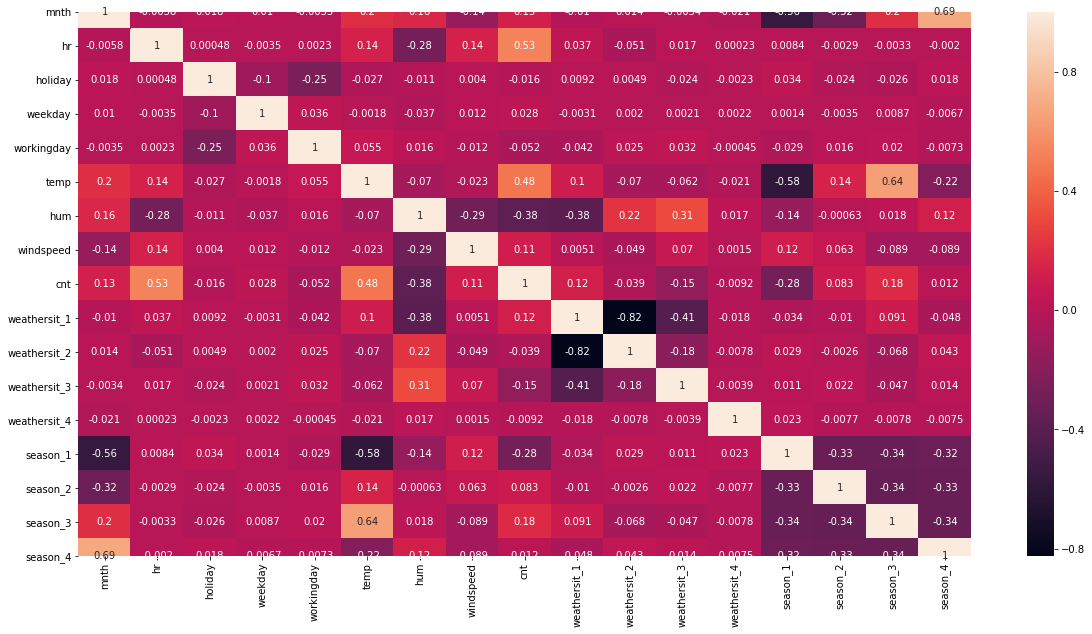

In [25]:
hmap=df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(hmap,ax=ax,annot=True)
plt.show()

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,2:]))

In [ ]:
#removing the outliers
df=df[(z<3).all(axis=1)]
df.shape

In [33]:
y=df.iloc[:,8:9]
y.head()


,cnt
0,3.793584
1,5.174802
2,4.709976
3,3.596684
4,1.000000


In [34]:
x=df.drop(['cnt'],axis=1)
x.head()

,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
0,1,0,0,6,0,0.24,0.81,0.0,1,0,0,0,1,0,0,0
1,1,1,0,6,0,0.22,0.80,0.0,1,0,0,0,1,0,0,0
2,1,2,0,6,0,0.22,0.80,0.0,1,0,0,0,1,0,0,0
3,1,3,0,6,0,0.24,0.75,0.0,1,0,0,0,1,0,0,0
4,1,4,0,6,0,0.24,0.75,0.0,1,0,0,0,1,0,0,0


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(10776, 16)
(4619, 16)
(10776, 1)
(4619, 1)


In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Predictions=",pred)
lr.score(x_train,y_train)

Predictions= [[ 5.68994141]
 [ 8.64379883]
 [ 5.23779297]
 ...
 [ 5.77294922]
 [10.29418945]
 [11.97509766]]


0.5320772416230606

In [37]:
model = RandomForestRegressor(bootstrap=True, criterion='mse',n_estimators=200)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    print("The score is:",score)
    print("The root mean squared error is:",rmsle)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')



The score is: 0.9894510593422224
The root mean squared error is: 0.05234979588258299
The score is: 0.925915486173157
The root mean squared error is: 0.13120953392572254


In [ ]:
#further check and found that the Random forest Regressor is giving te best results

In [38]:
from sklearn.externals import joblib
joblib.dump(model,'bikes_regeression.pkl')

['bikes_regeression.pkl']